# __05 Model Evaluation and Improvement__

To evaluate our supervised models, so far we have split our dataset into a training set
and a test set using the `train_test_split` function, built a model on the training set
by calling the fit method, and evaluated it on the test set using the score method,
which for classification computes the fraction of correctly classified samples. Here’s
an example of that process:

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state = 0)

# split data nad labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)

# evaluate the model in the test set
print(f'test set score: {logreg.score(X_test, y_test):.2f}')

test set score: 0.88


In this chapter, we will expand on two aspects of this evaluation. We will first intro‐
duce cross-validation, a more robust way to assess generalization performance, and
discuss methods to evaluate classification and regression performance that go beyond
the default measures of accuracy and $R^2$ provided by the score method.

## __Cross Validation__

_Cross-Validation_ is a statistical method of evaluating generalization
performance that is more stable and thorough than using a split into
a training and a test set. I cross-validation, the data is instead split
repeatedly and multiple models are trained.

The most commonly used version of cross-validation is __k-fold cross validation__, where _k_
is a user specified number. When performing _k-fold cross validation_, the data is first
partitioned into _k_ parts of (approximately) equal size, called _folds_.
Next, a sequence of models is trained. The first mdoel is trained using the first
fold as the test set, and the remaining folds 2-_k_ are used as the training set.

The model is built using the data in folds 2–k, and then the accuracy is evaluated on fold 1. Then
another model is built, this time using fold 2 as the test set and the data in folds 1, 3,
4, ..., _k_ as the training set. This process is repeated using folds 3, 4, ...,  _k_ as test sets.
For each of these five splits of the data into training and test sets, we compute the
accuracy. In the end, we have collected _k_ accuracy values.

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


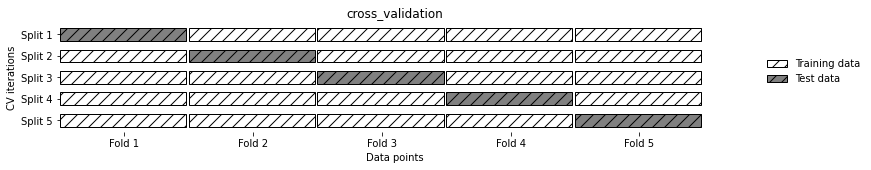

In [2]:
import mglearn
mglearn.plots.plot_cross_validation()

In [3]:
# prettu print numpy floats
import numpy as np
np.set_printoptions(precision = 3)

In [4]:
# applying cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 9000)

scores = cross_val_score(logreg, iris.data, iris.target)
print(f'cross-validation scores: {scores}')

cross-validation scores: [0.967 1.    0.933 0.967 1.   ]


In [5]:
# averag cross validation
print(f'average cross-validation score: {scores.mean():.3f}')

average cross-validation score: 0.973


Using the mean cross-validation we can conclude that we expect the model to be
around 96% accurate on average. Looking at all five scores produced by the five-fold
cross-validation, we can also conclude that there is a relatively high variance in the
accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could
imply that the model is very dependent on the particular folds used for training, but it
could also just be a consequence of the small size of the dataset.

There are several benefits to using cross-validation instead of a single split into a
training and a test set. First, remember that train_test_split performs a random
split of the data. Imagine that we are “lucky” when randomly splitting the data, and
all examples that are hard to classify end up in the training set. In that case, the test
set will only contain “easy” examples, and our test set accuracy will be unrealistically
high. Conversely, if we are “unlucky,” we might have randomly put all the hard-to-
classify examples in the test set and consequently obtain an unrealistically low score.
However, when using cross-validation, each example will be in the training set exactly
once: each example is in one of the folds, and each fold is the test set once. Therefore,
the model needs to generalize well to all of the samples in the dataset for all of the
cross-validation scores (and their mean) to be high.

Having multiple splits of the data also provides some information about how sensi‐
tive our model is to the selection of the training dataset. For the iris dataset, we saw
accuracies between 90% and 100%. This is quite a range, and it provides us with an
idea about how the model might perform in the worst case and best case scenarios
when applied to new data.

Another benefit of cross-validation as compared to using a single split of the data is
that we use our data more effectively. When using train_test_split , we usually use
75% of the data for training and 25% of the data for evaluation. When using five-fold
cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the
model. When using 10-fold cross-validation, we can use nine-tenths of the data
(90%) to fit the model. More data will usually result in more accurate models.

The main disadvantage of cross-validation is increased computational cost. As we are
now training k models instead of a single model, cross-validation will be roughly k
times slower than doing a single split of the data.

## Stratified k-Fold Cross-Validation and Other Strategies

scikit-learn does not use vanilla k-fold crossvalidation for classifica‐
tion, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we
split the data such that the proportions between classes are the same in each fold as
they are in the whole dataset.

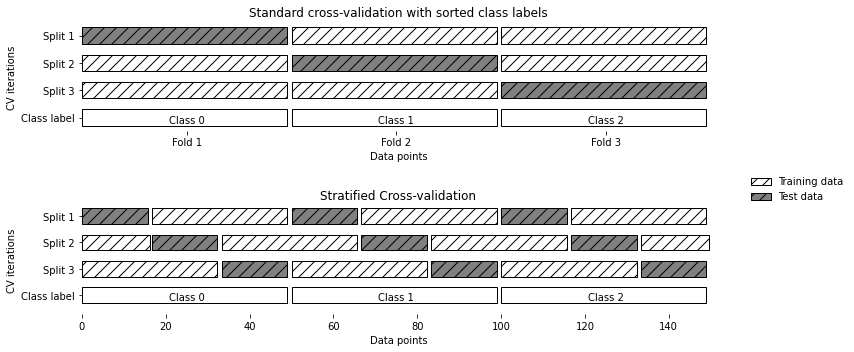

In [6]:
mglearn.plots.plot_stratified_cross_validation()

It is usually a good idea to use stratified k-fold cross-validation instead of k-fold
cross-validation to evaluate a classifier, because it results in more reliable estimates of
generalization performance. In the case of only 10% of samples belonging to class B,
using standard k-fold cross-validation it might easily happen that one fold only con‐
tains samples of class A. Using this fold as a test set would not be very informative
about the overall performance of the classifier.

For regression, scikit-learn uses the standard k-fold cross-validation by default. It
would be possible to also try to make each fold representative of the different values
the regression target has, but this is not a commonly used strategy and would be sur‐
prising to most users.

#### More control over cross-validation

We saw earlier that we can adjust the number of folds that are used in
cross_val_score using the cv parameter. However, scikit-learn allows for much
finer control over what happens during the splitting of the data by providing a cross-
validation splitter as the cv parameter. For most use cases, the defaults of k-fold cross-
validation for regression and stratified k-fold for classification work well, but there
are some cases where you might want to use a different strategy. Say, for example, we
want to use the standard k-fold cross-validation on a classification dataset to repro‐
duce someone else’s results. To do this, we first have to import the KFold splitter class
from the model_selection module and instantiate it with the number of folds we
want to use:

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3)
print(f'cross validation scores: {cross_val_score(logreg, iris.data, iris.target, cv = kfold)}')

cross validation scores: [0. 0. 0.]


This way, we can verify that it is indeed a really bad idea to use three-fold (nonstrati‐
fied) cross-validation on the iris dataset.

In [8]:
# shuffle data in Kfold
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print('cross-validation scores: ', cross_val_score(logreg, iris.data, iris.target, cv = kfold))

cross-validation scores:  [0.98 0.96 0.96]


Another frequently used cross-validation method is __leave-one-out__. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time consuming, particularly for large datasets, but sometimes provides better estimates on small datasets:

In [9]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print('number of cv iterations: ', len(scores))
print(f'mean accuracy: {scores.mean():.3f}')

number of cv iterations:  150
mean accuracy: 0.967


### Shuffle-Split Cross-Validation

Another, very flexible strategy for cross-validation is shuffle-split cross-validation. In
shuffle-split cross-validation, each split samples `train_size` many points for the
training set and `test_size` many (disjoint) point for the test set. This splitting is
repeated `n_iter` times.

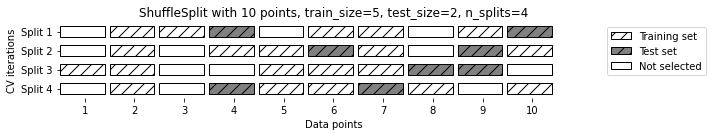

In [10]:
mglearn.plots.plot_shuffle_split()

In [11]:
# split dataset into 50% training set
# and 50% test set for 10 iterations
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = 0.5, train_size = 0.5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print(f'cross-validation scores: {scores}')

cross-validation scores: [0.973 0.973 0.96  0.96  1.    0.96  0.973 0.973 0.92  0.947]


Shuffle-split cross-validation allows for control over the number of iterations inde‐
pendently of the training and test sizes, which can sometimes be helpful. It also allows
for using only part of the data in each iteration, by providing `train_size` and
`test_size` settings that don’t add up to one. Subsampling the data in this way can be
useful for experimenting with large datasets.

### __Cross-Validation with groups__

Another very common setting for cross-validation is when there are groups in the
data that are highly related. Say you want to build a system to recognize emotions
from pictures of faces, and you collect a dataset of pictures of 100 people where each
person is captured multiple times, showing various emotions. The goal is to build a
classifier that can correctly identify emotions of people not in the dataset. You could
use the default stratified cross-validation to measure the performance of a classifier
here. However, it is likely that pictures of the same person will be in both the training
and the test set. It will be much easier for a classifier to detect emotions in a face that
is part of the training set, compared to a completely new face. To accurately evaluate
the generalization to new faces, we must therefore ensure that the training and test
sets contain images of different people.

To achieve this, we can use `GroupKFold`, which takes an array of groups ar argument that we can use to
indicate which person is in the image. The `groups` array here indicates groups in the data
that should not be split whenc reating the training ant test sets, and should no be
confused with the class label.

This example of groups in the data is common in medical applications, where you
might have multiple samples from the same patient, but are interested in generalizing
to new patients. Similarly, in speech recognition, you might have multiple recordings
of the same speaker in your dataset, but are interested in recognizing speech of new
speakers.

The following is an example of using a synthetic dataset with a grouping given by the
groups array. The dataset consists of 12 data points, and for each of the data points,
groups specifies which group (think patient) the point belongs to. The groups specify
that there are four groups, and the first three samples belong to the first group, the
next four samples belong to the second group, and so on:

In [12]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples = 12, random_state = 0)

# assume the first three samples belong to the same group
# then the next four, etc
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits = 3))
print('cross validation scores: ', scores)

cross validation scores:  [0.75  0.6   0.667]


As you can see, for each split, each group is either entirely in the training set or
entirely in the test set:

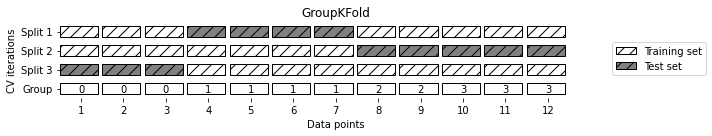

In [13]:
mglearn.plots.plot_group_kfold()

## __Grid Search__

Now that we know how to evaluate how well a model generalizes, we can take the
next step and improve the model’s generalization performance by tuning its parame‐
ters.
Finding the values of the important parameters of a
model (the ones that provide the best generalization performance) is a tricky task, but
necessary for almost all models and datasets. Because it is such a common task, there
are standard methods in scikit-learn to help you with it. The most commonly used
method is grid search, which basically means trying all possible combinations of the
parameters of interest.


### __Simple Grid Search__

We can implement a simple grid search just as `for` loops over the two parameters,
training and evaluating a classifeir for each combination:


In [14]:
# naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 0
)

print(f'shape of training set: {X_train.shape}', end = '   |   ')
print(f'shape of test set: {X_test.shape}')

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        
        #evaluate the SVC in the test set
        score = svm.score(X_test, y_test)
        
        #if we got a better score, store the score and params
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
    
print(f'best score: {best_score:.2f}')
print(f'best parameters: {best_parameters}')

shape of training set: (112, 4)   |   shape of test set: (38, 4)
best score: 0.97
best parameters: {'C': 100, 'gamma': 0.001}


### __The Danger of Overfitting the Parameters and Validation Set__

Given this resutl, we might be tempted to report that we dounf a model that
performs 97% accuracy on out dataset. However, this claom could be overly
optimistic (or just wrong), for thr following reason: we tried many
different parameters and selected the one with best accuracy on the test set, but
this accuracy won't necessarily carry over to new data. Because we used the test data
to adjust the parameters, we can no longer use it to asses how good the model is.
This is the same reason we needed to split the data into training and test
sets int he first place; we need an independent dataset to evaluateç, one that
was not used to create the model.

One way to resolve this problem is to split the data again, so we have three sets: the
training set to build the model, the validation (or development) set to select the
parameters of the model, and the test set to evaluate the performance of the selected
parameters.

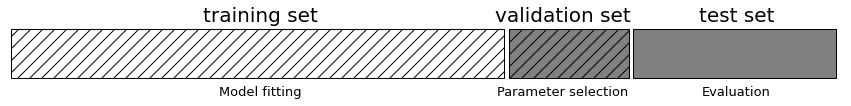

In [15]:
mglearn.plots.plot_threefold_split()

After selecting the best parameters using the validation set, we can rebuild a 
model using the parameter serings we found, but now training on both the training data
and the validation data. This way, we can use as mich data as possible
to build our model.


In [16]:
# implementation of the addition of validation set
from sklearn.svm import SVC

# split data into train + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state = 0
)

# split train + validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state = 1
)

print(f'shape of training set: {X_train.shape}', end = '  |  ')
print(f'shape of validation set: {X_valid.shape}', end = '  |  ')
print(f'shape of test set: {X_test.shape}')


best_score = 0
model_parameters = [0.001, 0.001, 0.1, 1, 10, 100]
for gamma in model_parameters:
    for C in model_parameters:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model in the combined training and validation set
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)

print(f"Best score on validation set: {best_score:.2f}")
print("Best parameters: ", best_parameters)
print(f"Test set score with best parameters: {test_score:.2f}")

shape of training set: (84, 4)  |  shape of validation set: (28, 4)  |  shape of test set: (38, 4)
Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


The best score on the validation set is 96%: slightly lower than before, probably
because we used less data to train the model ( X_train is smaller now because we split
our dataset twice). However, the score on the test set—the score that actually tells us
how well we generalize—is even lower, at 92%. So we can only claim to classify new
data 92% correctly, not 97% correctly as we thought before.

The distinction between the training set, validation set, and test set is fundamentally
important to applying machine learning methods in practice. Any choices made
based on the test set accuracy “leak” information from the test set into the model.
Therefore, it is important to keep a separate test set, which is only used for the final
evaluation. It is good practice to do all exploratory analysis and model selection using
the combination of a training and a validation set, and reserve the test set for a final
evaluation—this is even true for exploratory visualization. Strictly speaking, evaluat‐
ing more than one model on the test set and choosing the better of the two will result
in an overly optimistic estimate of how accurate the model is.

## __Grid Search with Cross-Valdiation__

While the method of splitting the data into a training, a validation, and a test set
that we just saw is workable, and relatively commonly used, it is quite sensitive to
how exactly the data is split.

For a better estimate of the generalziation performance, isntead of using
a single split into a training and a validation set, we can use cross-validation to
evaluate the performance of each parameter combination.

In [17]:
# implementation of the addition of validation set
from sklearn.svm import SVC

# split data into train + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state = 0
)

print(f'shape of train-validation set: {X_trainval.shape}', end = '  |  ')
print(f'shape of test set: {X_test.shape}')


best_score = 0
model_parameters = [0.001, 0.01, 0.1, 1, 10, 100]
for gamma in model_parameters:
    for C in model_parameters:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma = gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model in the combined training and validation set
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)

print(f"Best score on validation set: {best_score:.2f}")
print("Best parameters: ", best_parameters)
print(f"Test set score with best parameters: {test_score:.2f}")

shape of train-validation set: (112, 4)  |  shape of test set: (38, 4)
Best score on validation set: 0.97
Best parameters:  {'C': 10, 'gamma': 0.1}
Test set score with best parameters: 0.97


For each parameter setting (only a subset is shown), five accuracy values are compu‐
ted, one for each split in the cross-validation. Then the mean validation accuracy is
computed for each parameter setting.

The overall process of splitting the data, running the grid srach
and evaluating final parametes is depcited in the next diagram:

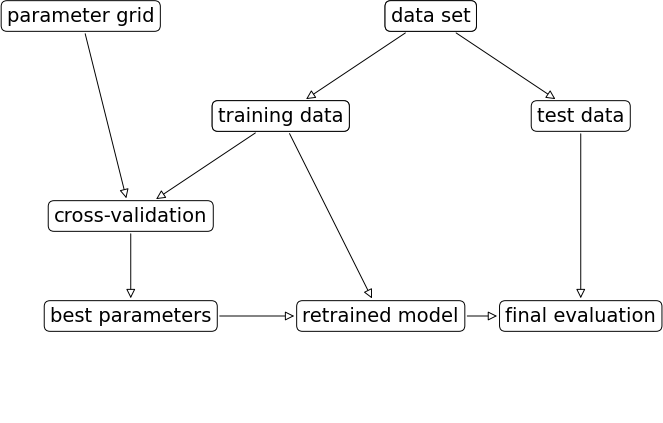

In [18]:
mglearn.plots.plot_grid_search_overview()

Because grid search with cross-validation is such a commonly used method to adjust
parameters, `scikit-learn` provides the `GridSearchCV` class, which implements it in
the form of an estimator. To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. `GridSearchCV` will then per‐
form all the necessary model fits. The keys of the dictionary are the names of parame‐
ters we want to adjust (as given when constructing the model—in this case, C and
gamma ), and the values are the parameter settings we want to try out.

In [19]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

print(f'parameter grid:\n{param_grid}')

# now we can instntiate GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)

# GridSearchCV will use cross-validation in place of the split into a training
# and validation set that we used before. However, we still need to split
# the data into a training and a test set, to avoid overfitting the parameters:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 0
)

# The grid_search object that we created behaves just like a
# classifier; we can call the standard methods fit , predict , and score on it.
grid_search.fit(X_train, y_train)

parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print(f'test set score: {grid_search.score(X_test, y_test):.3f}')

test set score: 0.974


Choosing the parameters using cross-validation, we actually found a model that ach‐
ieves 97% accuracy on the test set. The important thing here is that we did not use the
test set to choose the parameters. The parameters that were found are scored in the
`best_params_` attribute, and the best cross-valdiation accuracy is stored in
`best_score_`

In [21]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


__Again, be careful not to confuse best_score_ with the generaliza‐
tion performance of the model as computed by the score method
on the test set. Using the score method (or evaluating the output of
the predict method) employs a model trained on the whole train‐
ing set. The best_score_ attribute stores the mean cross-validation
accuracy, with cross-validation performed on the training set.__

In [22]:
print(f"Best estimator:\n{grid_search.best_estimator_}")

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Because `grid_search` itself has predict and score methods, using `best_estimator_`
is not needed to make predictions or evaluate the model.

### __Analyzing the result of cross-validation__

We can then inspect the results of the cross-validated
grid search, and possibly expand our search. The results of a grid search can be found
in the cv_results_ attribute, which is a dictionary storing all aspects of the search.
It contains a lot of details, as you can see in the following output, and is best looked at
after converting it to a pandas DataFrame: 

In [23]:
import pandas as pd

# convert to dataframe
results = pd.DataFrame(grid_search.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001173,0.000240,0.000555,0.000086,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001078,0.000101,0.000598,0.000063,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001075,0.000166,0.000570,0.000170,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000905,0.000085,0.000561,0.000173,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001015,0.000203,0.000548,0.000119,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


As we were searching a two-dimensional grid of
parameters ( C and gamma ), this is best visualized as a heat map

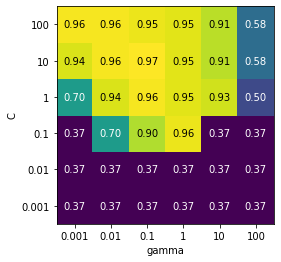

In [26]:
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-valdation scores
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels=param_grid['gamma'],
                      ylabel = 'C', yticklabels=param_grid['C'], cmap = 'viridis')
plt.show()

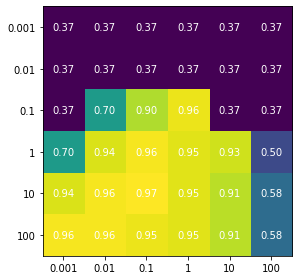

In [46]:
fig, ax = plt.subplots()
plt.imshow(scores)
# Loop over data dimensions and create text annotations.
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        text = ax.text(j, i, f'{scores[i, j]:.2f}', ha="center", va="center", color="w")

ax.set_xticks(np.arange(len(param_grid['gamma'])))
ax.set_yticks(np.arange(len(param_grid['C'])))

ax.set_xticklabels(param_grid['gamma'])
ax.set_yticklabels(param_grid['C'])

fig.tight_layout()
plt.show()

In [45]:
param_grid['C']

[0.001, 0.01, 0.1, 1, 10, 100]

Each point in the heat map corresponds to one run of cross-validation, with a partic‐
ular parameter setting. The color encodes the cross-validation accuracy, with light
colors meaning high accuracy and dark colors meaning low accuracy. You can see
that SVC is very sensitive to the setting of the parameters. For many of the parameter
settings, the accuracy is around 40%, which is quite bad; for other settings the accu‐
racy is around 96%. We can take away from this plot several things. First, the parame‐
ters we adjusted are very important for obtaining good performance. Both parameters
( C and gamma ) matter a lot, as adjusting them can change the accuracy from 40% to
96%. Additionally, the ranges we picked for the parameters are ranges in which we
see significant changes in the outcome. It’s also important to note that the ranges for
the parameters are large enough: the optimum values for each parameter are not on
the edges of the plot.

Now let’s look at some plots where the result is less ideal,
because the search ranges were not chosen properly:

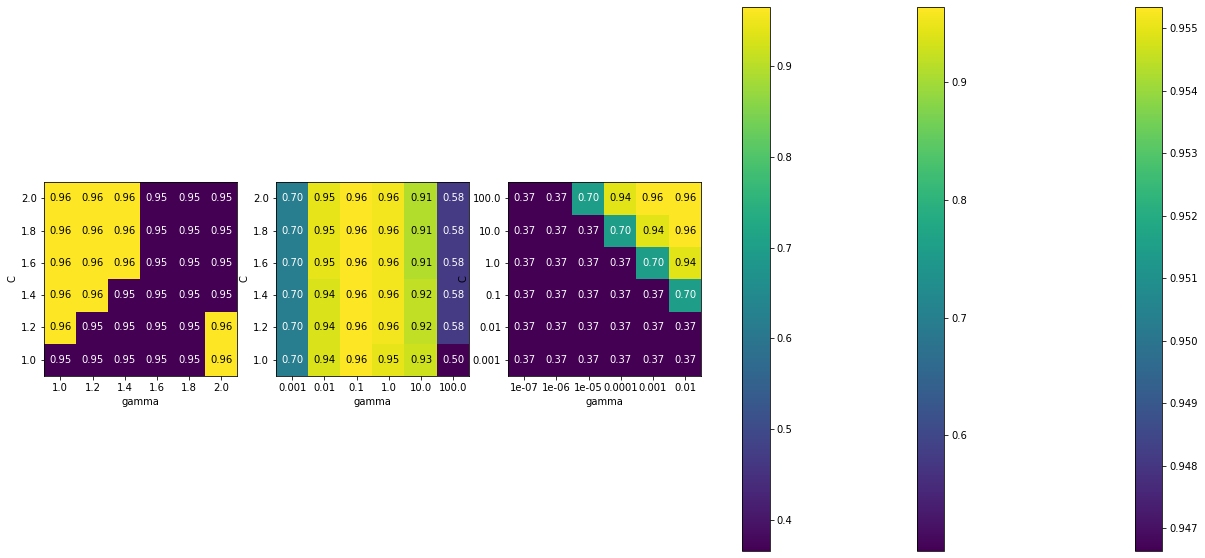

In [51]:
fig, axes = plt.subplots(1, 3, figsize = (23, 10))

param_grid_linear = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.linspace(1, 2, 6)
}

param_grid_one_log = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.logspace(-3, 2, 6)
}

param_grid_range = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-7, -2, 6)
}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # plot the mean cross-validation scores
    scores_images = mglearn.tools.heatmap(
        scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'],
        yticklabels = param_grid['C'], cmap = 'viridis', ax = ax
    )
    
    plt.colorbar(scores_images, ax = axes.tolist())

The first panel shows no changes at all, with a constant color over the whole parame‐
ter grid. In this case, this is caused by improper scaling and range of the parameters C
and gamma . However, if no change in accuracy is visible over the different parameter
settings, it could also be that a parameter is just not important at all. It is usually good
to try very extreme values first, to see if there are any changes in the accuracy as a
result of changing a parameter.

The second panel shows a vertical stripe pattern. This indicates that only the setting
of the gamma parameter makes any difference. This could mean that the gamma parameter
is searching over interesting values but the C parameter is not—or it could mean
the C parameter is not important.

The third panel shows changes in both C and gamma . However, we can see that in the
entire bottom left of the plot, nothing interesting is happening. We can probably
exclude the very small values from future grid searches. The optimum parameter setting
is at the top right. As the optimum is in the border of the plot, we can expect that
there might be even better values beyond this border, and we might want to change
our search range to include more parameters in this region.
Tuning the parameter grid based on the cross-validation scores is perfectly fine, and a
good way to explore the importance of different parameters. However, you should
not test different parameter ranges on the final test set—as we discussed earlier, eval
uation of the test set should happen only once we know exactly what model we want
to use.

### Search over spaces that are not grids
In some cases, trying all possible combinations of all parameters as GridSearchCV
usually does, is not a good idea. For example, SVC has a kernel parameter, and
depending on which kernel is chosen, other parameters will be relevant. If ker
nel='linear' , the model is linear, and only the C parameter is used. If kernel='rbf' ,
both the C and gamma parameters are used (but not other parameters like degree ). In
this case, searching over all possible combinations of C , gamma , and kernel wouldn’t
make sense: if kernel='linear' , gamma is not used, and trying different values for
gamma would be a waste of time. To deal with these kinds of “conditional” parameters,
GridSearchCV allows the param_grid to be a list of dictionaries. Each dictionary in the
list is expanded into an independent grid. A possible grid search involving kernel and
parameters could look like this:

In [56]:
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['linear'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
]

from pprint import pprint
pprint(f'list of grids:\n{param_grid}')

('list of grids:\n'
 "[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, "
 "0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, "
 '10, 100]}]')


In [57]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print(f'best perameters: {grid_search.best_params_}')
print(f'best cross-validation score: {grid_search.best_score_:.2f}')

best perameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best cross-validation score: 0.97


In [58]:
# let's look at the cv_results_ again
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00114684,0.00118756,0.00113792,0.00100536,0.000984573,0.00111184,0.00117407,0.00114579,0.00098033,0.0011642,...,0.000537491,0.000699091,0.000970745,0.00120978,0.000781727,0.00065012,0.000605679,0.000664377,0.00060997,0.000599909
std_fit_time,0.000152384,0.000168925,0.000157154,6.946e-05,3.75664e-05,5.58288e-05,0.000235827,9.86992e-05,3.22757e-05,0.000182697,...,3.349e-05,8.25765e-05,2.42286e-05,5.93626e-05,0.000105715,3.06905e-05,2.22584e-05,8.90866e-05,0.0001095,7.10563e-05
mean_score_time,0.000550461,0.000614357,0.000678825,0.000480747,0.000529575,0.000545359,0.000840378,0.000603151,0.000519419,0.000590181,...,0.00033927,0.000393391,0.000374794,0.00046587,0.000435543,0.000351,0.000361729,0.000382614,0.000351763,0.000347376
std_score_time,7.19198e-05,5.35996e-05,0.000223606,1.72761e-05,0.000112735,4.18468e-05,0.000286524,3.75857e-05,2.92708e-05,8.39658e-05,...,7.51983e-06,8.51142e-05,2.10333e-05,7.39055e-05,0.000107562,1.65246e-05,2.21549e-05,6.22314e-05,4.14348e-05,1.79869e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


### __Nested Cross-Validation__

In the preceding examples, we went form using a single split of the data
into training, validation, and test sets to splitting the data into training and
test sets and then performing cross-validation on the training set. But when using
`GridSearchCV` as described earlier, we still have a single split of the data into training
and test sets, which might take our results unstable and make us depend to much on this
single split of the data. We can go a step further, and instead of splitting the original data
into training and test sets once, use multiple splits of cross-validation. This will result
in what is called nested cross-validation. In nested cross-validation, there is an outer
loop over splits of the data into training and test sets. For each of them, a grid search
is run (which might result in different best parameters for each split in the outer
loop). Then, for each outer split, the test set score using the best settings is reported.

The result of this procedure is a list of scores - not a model, and not a parameter setting-
The scores tell us how well a model generalizes, given the best parameters found by the grid.
As it doens't provide a model that can be used on new data, nested cross-valdiation is rarely
used when looking for a predictive model to apply to future data.
However, it can be useful for evaluating how well a given model works on
a particular dataset.


In [65]:
# implementing nested cross-validation in scikit-learn is
# straightforward
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5),
                         iris.data, iris.target, cv = 5, verbose = 2,
                         n_jobs = 6)
print('cross-validation scores: ', scores)
print('mean cross-validation score. ', scores.mean())

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


cross-validation scores:  [0.967 1.    0.9   0.967 1.   ]
mean cross-validation score.  0.9666666666666668


[Parallel(n_jobs=6)]: Done   3 out of   5 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.6s finished


The result of our nested cross-validation can be summarized as "SVC can achieve ~98% mean
cross valdiation accuracy on the `iris` dataset" - nothing more, nothing less.

Here, we used stratified five-fold cross-validation in both the inner and the outer
loop. As our param_grid contains 36 combinations of parameters, this results in a
whopping 36 * 5 * 5 = 900 models being built, making nested cross-validation a very
expensive procedure. Here, we used the same cross-validation splitter in the inner
and the outer loop; however, this is not necessary and you can use any combination
of cross-validation strategies in the inner and outer loops. It can be a bit tricky to
understand what is happening in the single line given above, and it can be helpful to
visualize it as for loops, as done in the following simplified implementation:

In [66]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split mehtod returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_params = {}
        best_score = -np.inf
        
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score voer inner splits
            cv_scores = []
            
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]
            ):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
                
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember params
                best_score = mean_score
                best_params = parameters
        
        # build a classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    
    return np.array(outer_scores)

In [67]:
# run this fucntion on iris
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(
    iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid)
)

print(f'cross validation scores: {scores}')

cross validation scores: [0.967 1.    0.967 0.967 1.   ]


In [ ]:
While running a grid search over many parameters and on large datasets can be com‐
putationally challenging, it is also embarrassingly parallel. This means that building a